In [ ]:
import importlib
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import pickle as pkl
import matplotlib.pyplot as plt

from sccoda.util import comp_ana as mod
from sccoda.util import cell_composition_data as dat
from sccoda.util import data_visualization as viz

In [94]:
df = pd.read_csv("R_Projects/scAtlas/Revision/scCODA/df_SN.csv")

In [95]:
df

,condition,sample,ASPCs,Adipocytes,Arterial Endothelial cells,B cells,Capillary Endothelial cells 1,Capillary Endothelial cells 2,Lymphatic Endothelial cells,Macrophages and Monocytes,Mast cells,Mural cells,SubEndothelial cells,T and NK cells,Venous Endothelial cells 1,Venous Endothelial cells 3,Venous Endothelial cells 2
0,Lean,2_sat,274,260,17,5,193,12,4,93,22,77,45,45,26,1,0
1,Lean,4_sat,674,587,118,19,609,3,19,305,7,250,135,137,162,0,7
2,Lean,Hs_SAT_04,503,303,156,31,125,1,7,338,45,116,107,205,95,5,1
3,Lean,Hs_SAT_254,3417,4555,269,13,451,45,78,1982,93,250,289,293,332,13,8
4,Lean,Hs_SAT_255,1284,1378,168,17,209,24,10,947,42,250,114,423,100,2,74
5,Lean,Hs_SAT_266,1489,1343,593,6,351,22,78,364,27,412,335,80,348,20,177
6,Lean,SAT13,5705,4472,410,19,225,13,66,2760,181,498,1551,231,534,4,316
7,Lean,SAT54,2448,1543,397,7,1011,29,53,1160,18,612,2616,146,913,0,385
8,Lean,SAT58,384,265,82,2,150,41,26,92,2,150,257,27,143,7,69
9,Lean,SAT60,906,1167,163,11,634,105,17,140,21,524,235,118,307,20,139


In [96]:
data = dat.from_pandas(df, covariate_columns=['condition', 'sample'])

In [97]:
data

AnnData object with n_obs × n_vars = 34 × 15
    obs: 'condition', 'sample'

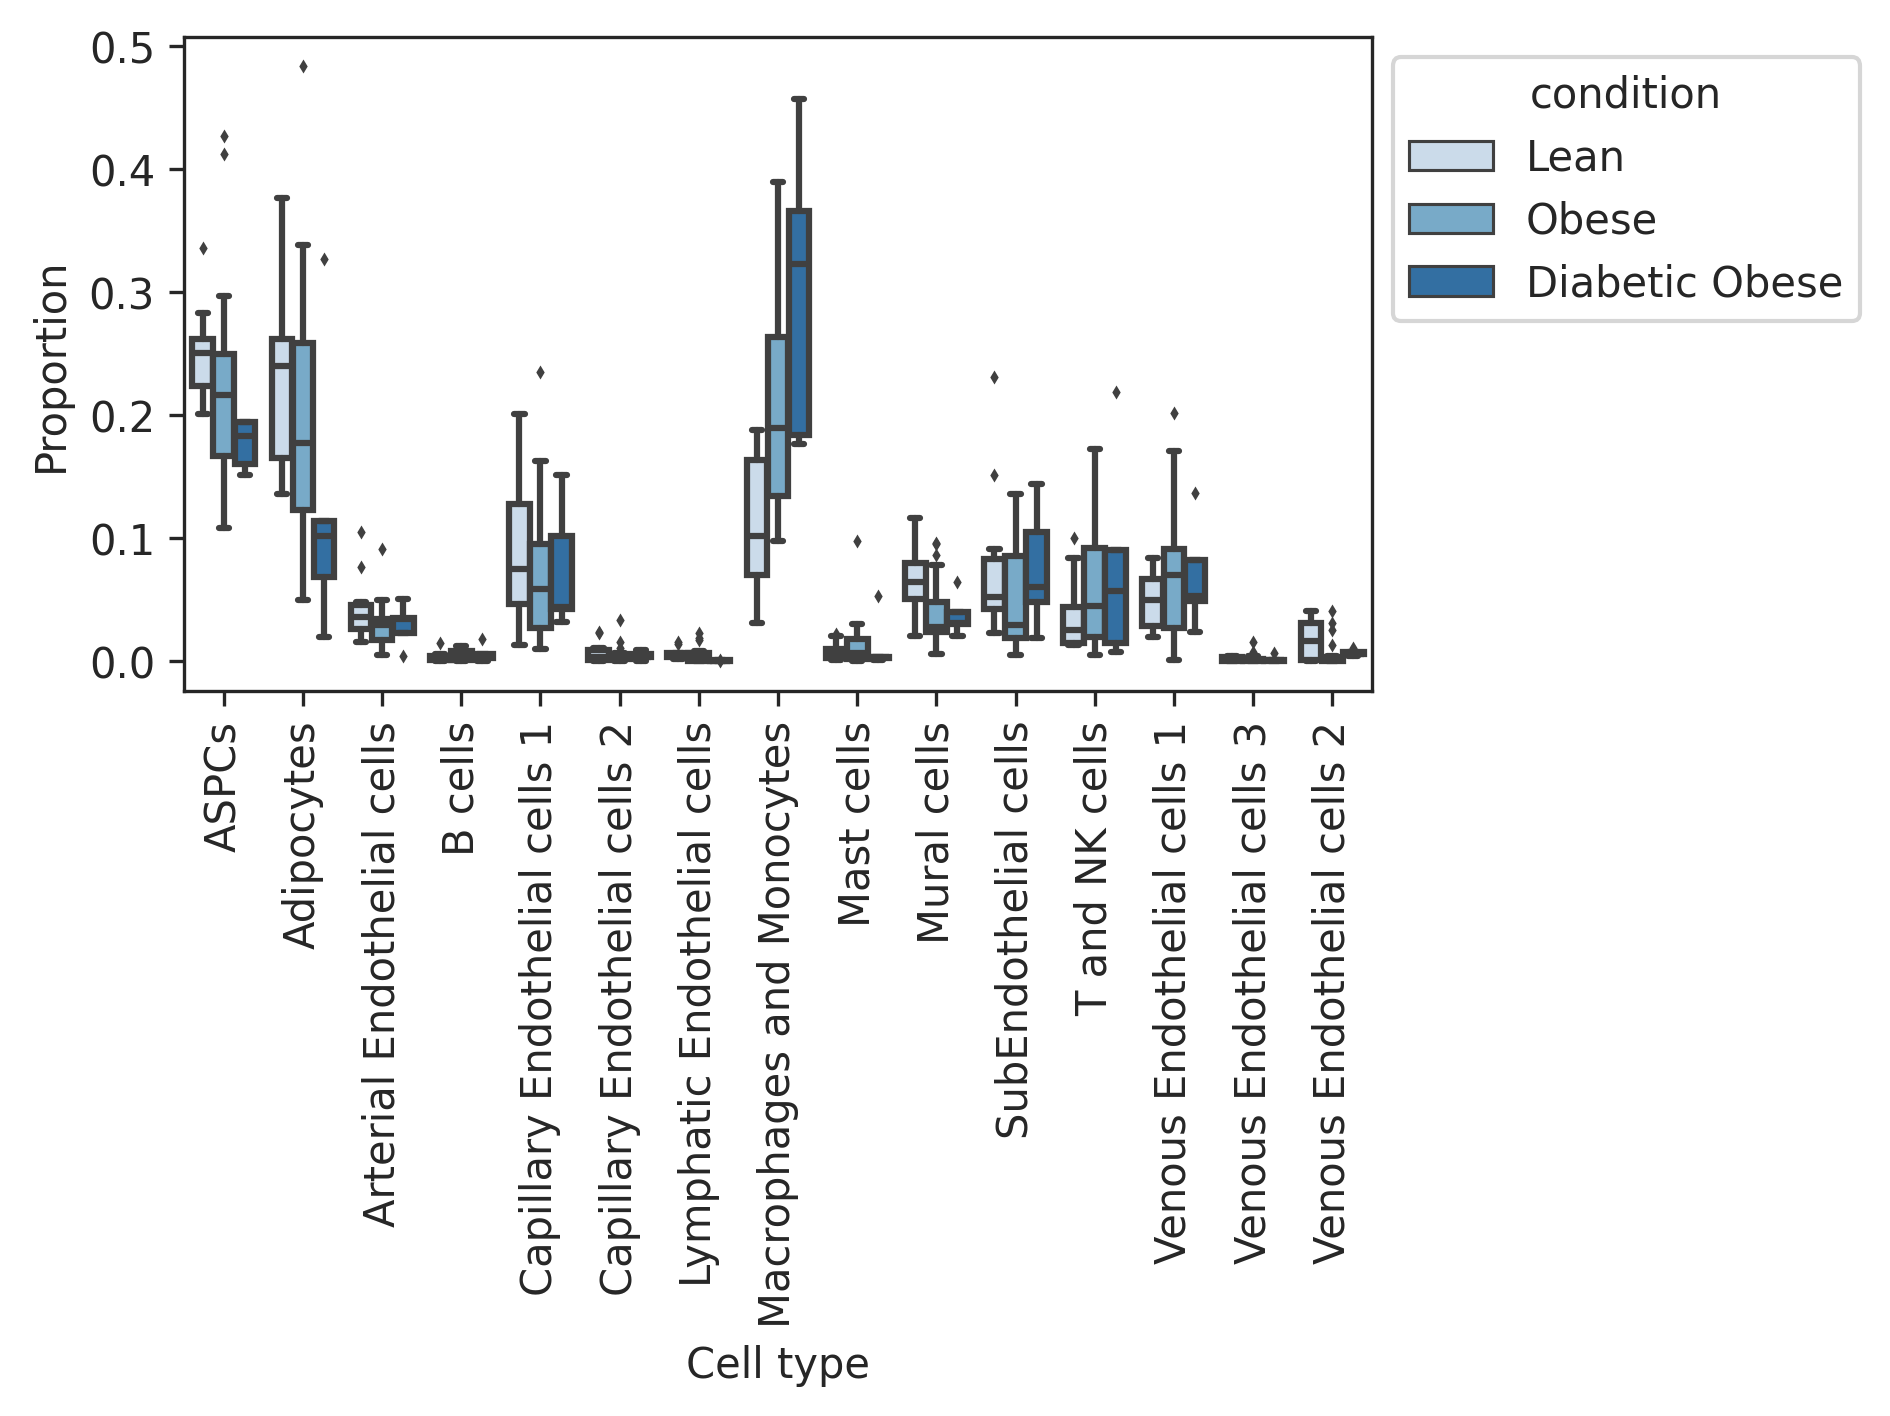

In [98]:
viz.boxplots(data, feature_name="condition", dpi=300)
plt.show()

# Finding a reference cell type

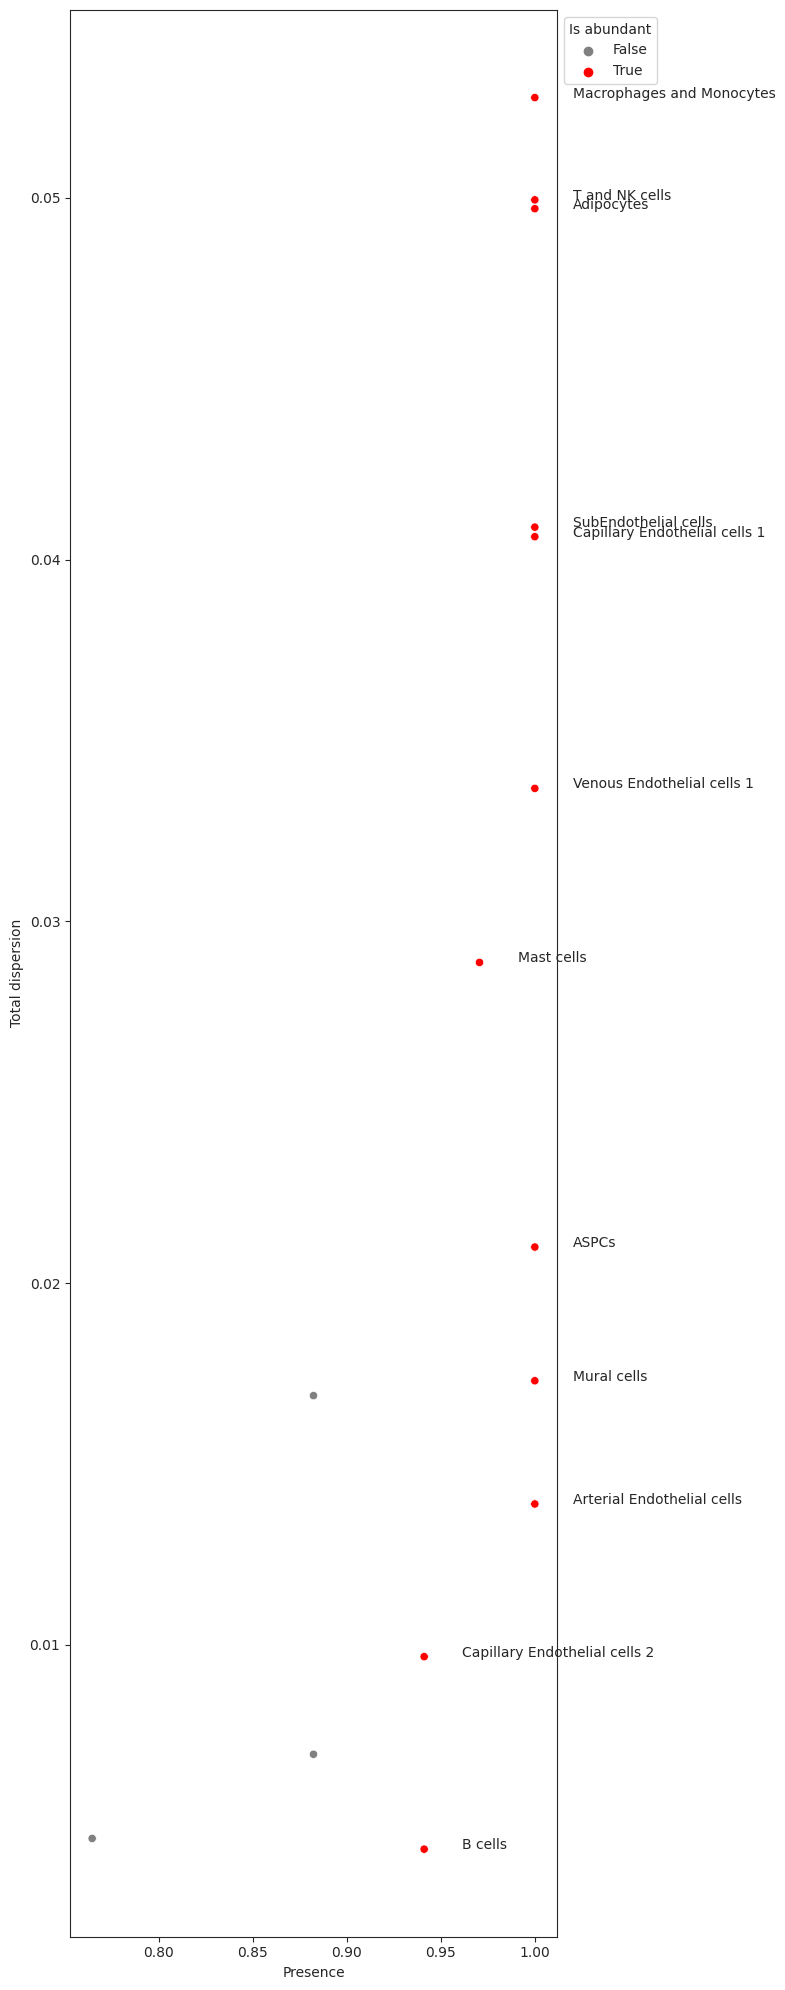

In [99]:
_ = viz.rel_abundance_dispersion_plot(
    data=data,
    abundant_threshold=0.9,
    figsize=(8, 20)
)

In [100]:
model = mod.CompositionalAnalysis(data, formula="C(condition, Treatment('Lean'))", reference_cell_type="automatic")

Automatic reference selection! Reference cell type set to Arterial Endothelial cells
Zero counts encountered in data! Added a pseudocount of 0.5.


In [101]:
# Run MCMC 10 times
N_RUNS = 10

for run in range(N_RUNS):
    results = model.sample_hmc()
    file_name = f"R_Projects/scAtlas/Revision/scCODA/sccoda_SN/run_{run}.pickle"
    results.save(file_name)

100%|█████████████████████████████████████| 20000/20000 [04:51<00:00, 68.52it/s]


MCMC sampling finished. (365.413 sec)
Acceptance rate: 60.0%


100%|█████████████████████████████████████| 20000/20000 [04:48<00:00, 69.39it/s]


MCMC sampling finished. (361.189 sec)
Acceptance rate: 55.7%


100%|█████████████████████████████████████| 20000/20000 [04:46<00:00, 69.89it/s]


MCMC sampling finished. (358.067 sec)
Acceptance rate: 62.0%


100%|█████████████████████████████████████| 20000/20000 [04:40<00:00, 71.42it/s]


MCMC sampling finished. (352.349 sec)
Acceptance rate: 52.7%


100%|█████████████████████████████████████| 20000/20000 [04:42<00:00, 70.77it/s]


MCMC sampling finished. (354.120 sec)
Acceptance rate: 62.3%


100%|█████████████████████████████████████| 20000/20000 [04:50<00:00, 68.90it/s]


MCMC sampling finished. (364.839 sec)
Acceptance rate: 70.9%


100%|█████████████████████████████████████| 20000/20000 [04:46<00:00, 69.91it/s]


MCMC sampling finished. (357.763 sec)
Acceptance rate: 53.9%


100%|█████████████████████████████████████| 20000/20000 [04:49<00:00, 69.03it/s]


MCMC sampling finished. (363.395 sec)
Acceptance rate: 68.6%


100%|█████████████████████████████████████| 20000/20000 [04:38<00:00, 71.91it/s]


MCMC sampling finished. (349.624 sec)
Acceptance rate: 61.7%


100%|█████████████████████████████████████| 20000/20000 [04:38<00:00, 71.91it/s]


MCMC sampling finished. (349.881 sec)
Acceptance rate: 55.1%


In [102]:
results.summary()

Compositional Analysis summary:

Data: 34 samples, 15 cell types
Reference index: 2
Formula: C(condition, Treatment('Lean'))

Intercepts:
                               Final Parameter  Expected Sample
Cell Type                                                      
ASPCs                                    2.139      1357.292336
Adipocytes                               1.992      1171.742299
Arterial Endothelial cells               0.362       229.578970
B cells                                 -0.840        69.009699
Capillary Endothelial cells 1            0.968       420.837623
Capillary Endothelial cells 2           -0.796        72.113918
Lymphatic Endothelial cells             -0.870        66.970154
Macrophages and Monocytes                1.524       733.807744
Mast cells                              -0.579        89.590301
Mural cells                              0.673       313.326903
SubEndothelial cells                     0.801       356.112633
T and NK cells                

In [103]:
print(results.credible_effects())

Covariate                                          Cell Type                    
C(condition, Treatment('Lean'))[T.Diabetic Obese]  ASPCs                            False
                                                   Adipocytes                        True
                                                   Arterial Endothelial cells       False
                                                   B cells                          False
                                                   Capillary Endothelial cells 1    False
                                                   Capillary Endothelial cells 2    False
                                                   Lymphatic Endothelial cells      False
                                                   Macrophages and Monocytes         True
                                                   Mast cells                       False
                                                   Mural cells                      False
                   

In [104]:
# Combine the results in a dataframe

In [105]:
N_RUNS = 10

for run in range(N_RUNS):
    file_name = f"R_Projects/scAtlas/Revision/scCODA/sccoda_SN/run_{run}.pickle"
    with open(file_name, "rb") as fd:
        results = pkl.load(fd)
    if run == 0:
        df = pd.DataFrame(results.credible_effects())
        merged = results.summary_prepare()[1][['Final Parameter']].reset_index()
        merged.rename(columns={'Final Parameter': f'RUN_{run}'}, inplace=True)
    else:
        df_ = pd.DataFrame(results.credible_effects())
        df = pd.merge(df, df_, on=['Covariate', 'Cell Type'], suffixes=('', f'_{run}'))
        _merged = results.summary_prepare()[1][['Final Parameter']].reset_index()
        _merged.rename(columns={'Final Parameter': f'RUN_{run}'}, inplace=True)
        merged = pd.merge(merged, _merged, on=['Covariate', 'Cell Type'])
df.rename(columns={'Final Parameter': 'Final Parameter_0'}, inplace=True)
cols = [i.replace("Final Parameter", "Run") for i in df.columns]
df.columns = cols
merged.set_index(['Covariate', 'Cell Type'], inplace=True)

In [106]:
merged

RUN_0  \
Covariate                                         Cell Type                                 
C(condition, Treatment('Lean'))[T.Diabetic Obese] ASPCs                          0.000000   
                                                  Adipocytes                    -0.619573   
                                                  Arterial Endothelial cells     0.000000   
                                                  B cells                        0.000000   
                                                  Capillary Endothelial cells 1  0.000000   
                                                  Capillary Endothelial cells 2  0.000000   
                                                  Lymphatic Endothelial cells    0.000000   
                                                  Macrophages and Monocytes      0.765560   
                                                  Mast cells                     0.000000   
                                                  Mural cells                    0.000000   
                                                  SubEndothelial cells           0.000000   
                                                  T and NK cells                 0.000000   
                                                  Venous Endothelial cells 1     0.000000   
                                                  Venous Endothelial cells 3     0.000000   
                                                  Venous Endothelial cells 2     0.000000   
C(condition, Treatment('Lean'))[T.Obese]          ASPCs                          0.000000   
                                                  Adipocytes                     0.000000   
                                                  Arterial Endothelial cells     0.000000   
                                                  B cells                        0.000000   
                                                  Capillary Endothelial cells 1  0.000000   
                                                  Capillary Endothelial cells 2  0.000000   
                                                  Lymphatic Endothelial cells    0.000000   
                                                  Macrophages and Monocytes      0.449709   
                                                  Mast cells                     0.000000   
                                                  Mural cells                    0.000000   
                                                  SubEndothelial cells           0.000000   
                                                  T and NK cells                 0.000000   
                                                  Venous Endothelial cells 1     0.000000   
                                                  Venous Endothelial cells 3     0.000000   
                                                  Venous Endothelial cells 2     0.000000   

                                                                                    RUN_1  \
Covariate                                         Cell Type                                 
C(condition, Treatment('Lean'))[T.Diabetic Obese] ASPCs                          0.000000   
                                                  Adipocytes                    -0.626409   
                                                  Arterial Endothelial cells     0.000000   
                                                  B cells                        0.000000   
                                                  Capillary Endothelial cells 1  0.000000   
                                                  Capillary Endothelial cells 2  0.000000   
                                                  Lymphatic Endothelial cells    0.000000   
                                                  Macrophages and Monocytes      0.767422   
                                                  Mast cells                     0.000000   
                                                  Mural cells                    0.0

# Average values across runs

In [107]:
merged.apply(lambda x: np.mean(x), axis=1)

Covariate                                          Cell Type                    
C(condition, Treatment('Lean'))[T.Diabetic Obese]  ASPCs                            0.000000
                                                   Adipocytes                      -0.620349
                                                   Arterial Endothelial cells       0.000000
                                                   B cells                          0.000000
                                                   Capillary Endothelial cells 1    0.000000
                                                   Capillary Endothelial cells 2    0.000000
                                                   Lymphatic Endothelial cells      0.000000
                                                   Macrophages and Monocytes        0.772817
                                                   Mast cells                       0.000000
                                                   Mural cells                    

In [108]:
def create_heatmap_runs(df, output_plot=None):
    fig = plt.figure(figsize=(6, 14))

    ax = sns.heatmap(
        df, cmap="vlag", center=0, vmax=1, vmin=-1,
        linewidths=.5, xticklabels=1, 
        yticklabels=1, cbar=True, 
        annot_kws={"fontsize": 14},
        cbar_kws={"orientation": "horizontal"}
    )
    ax.set_xlabel('Runs', fontsize = 14)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14)

    yticks = [x[0].replace("C(Groups, Treatment('F'))", "") + "-" + x[1] for x in df.index.to_list()]
    ax.set_yticklabels(labels=yticks, fontsize=10)

    xticks = df.columns
    ax.set_xticklabels(labels=xticks, fontsize=12, rotation=90)

    if output_plot:
        plt.savefig(output_plot, bbox_inches='tight')
        
    plt.tight_layout()
    plt.show()

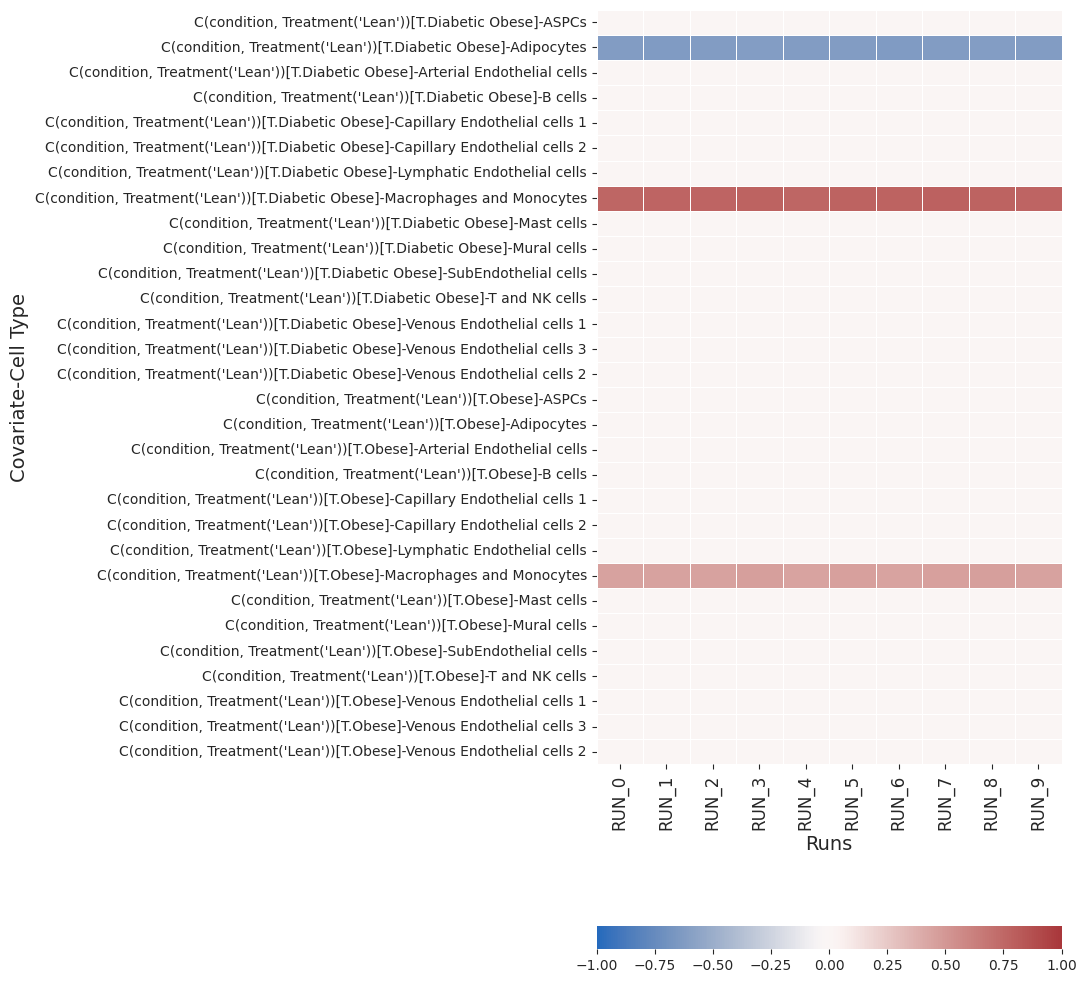

In [109]:
create_heatmap_runs(merged, output_plot='R_Projects/scAtlas/Revision/scCODA/sccoda_SN/Heatmap_runs.pdf')

In [110]:
def create_heatmap_credible_effects(df, output_plot=None):
    fig = plt.figure(figsize=(8, 12))

    ax = sns.heatmap(
        df, cmap="Blues", linewidths=.5, xticklabels=1, 
        yticklabels=1, cbar=False, annot_kws={"fontsize": 14}
    )
    ax.set_xlabel('Runs', fontsize = 14)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 14)

    yticks = [x[0].replace("C(Groups, Treatment('F'))", "") + "-" + x[1] for x in df.index.to_list()]
    ax.set_yticklabels(labels=yticks, fontsize=10)

    xticks = df.columns
    ax.set_xticklabels(labels=xticks, fontsize=12, rotation=90)

    if output_plot:
        plt.savefig(output_plot, bbox_inches='tight')
        
    plt.tight_layout()
    plt.show()

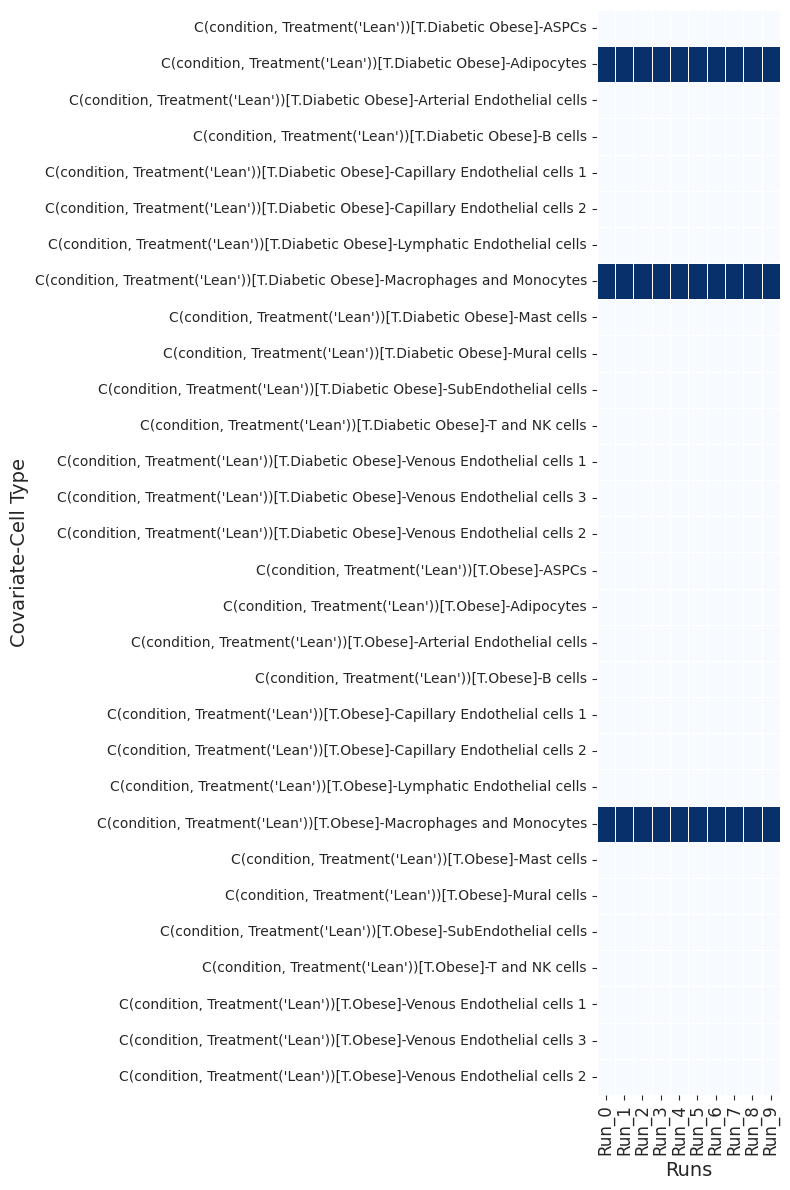

In [111]:
create_heatmap_credible_effects(df, output_plot='R_Projects/scAtlas/Revision/scCODA/sccoda_SN/heatmap_runs_cred.pdf')